In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.gofplots as smg
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D




In [3]:
df = pd.read_csv('C:\\Users\\jedre\\OneDrive - Trinity College Dublin\\BUSINESS ANALYTICS\\Lecture 2 - LINEAR REGRESSION/Armanos Pizza\\Armanos_Pizza_raw.csv')


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Restaurant          10 non-null     int64
 1   Student_Population  10 non-null     int64
 2   Annual_Sales        10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


In [5]:
# Create pairwise correlation matrix
correlation_matrix = df[['Student_Population', 'Annual_Sales']].corr()
print(correlation_matrix)

                    Student_Population  Annual_Sales
Student_Population            1.000000      0.950123
Annual_Sales                  0.950123      1.000000


<Axes: >

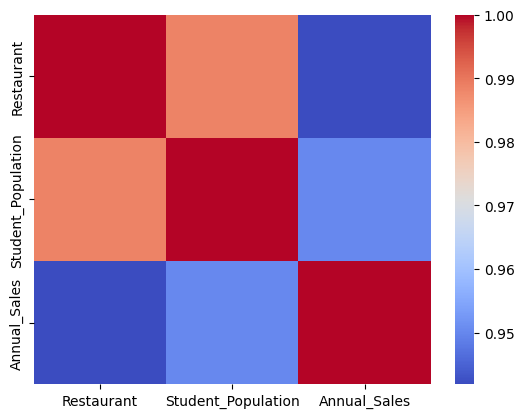

In [6]:
numeric_df = df.select_dtypes(include=['number'])

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")

In [7]:
df.head()

,Restaurant,Student_Population,Annual_Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117


In [8]:
df.describe()

,Restaurant,Student_Population,Annual_Sales
count,10.00000,10.00000,10.000000
mean,5.50000,14.00000,130.000000
std,3.02765,7.94425,41.806432
min,1.00000,2.00000,58.000000
25%,3.25000,8.00000,108.000000
50%,5.50000,14.00000,127.500000
75%,7.75000,20.00000,155.000000
max,10.00000,26.00000,202.000000


### Simple linear regression

In [9]:
model = smf.ols(formula='Annual_Sales ~ Student_Population', data=df)
results = model.fit()



In [10]:
# Display the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Annual_Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           2.55e-05
Time:                        12:13:04   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

C:\Users\jedre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [11]:
# Predicted values
predicted_values = results.predict()

# Actual values
actual_values = df['Annual_Sales']

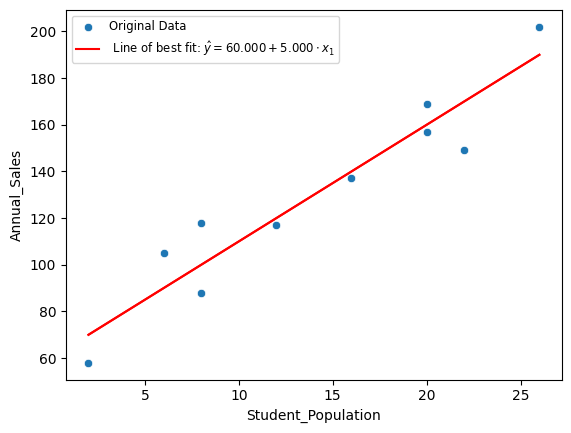

In [12]:
# Plot the actual data
sns.scatterplot(x='Student_Population', y='Annual_Sales', data=df, label='Original Data')

# Plot the regression line
plt.plot(df['Student_Population'], results.fittedvalues, color='red')

# Extracting the intercept and coefficient from the fitted model (results)
intercept = results.params.iloc[0]
coef = results.params.iloc[1]

# Create a dynamically generated label with the equation:
equation_text = fr" Line of best fit: $\hat{{y}} = {intercept:.3f} + {coef:.3f} \cdot x_1$"

# Plot the regression line with the dynamic equation in the legend
plt.plot(df['Student_Population'], results.fittedvalues, color='red', label=equation_text)

# Show the legend and plot
plt.legend(fontsize='small')
plt.show()


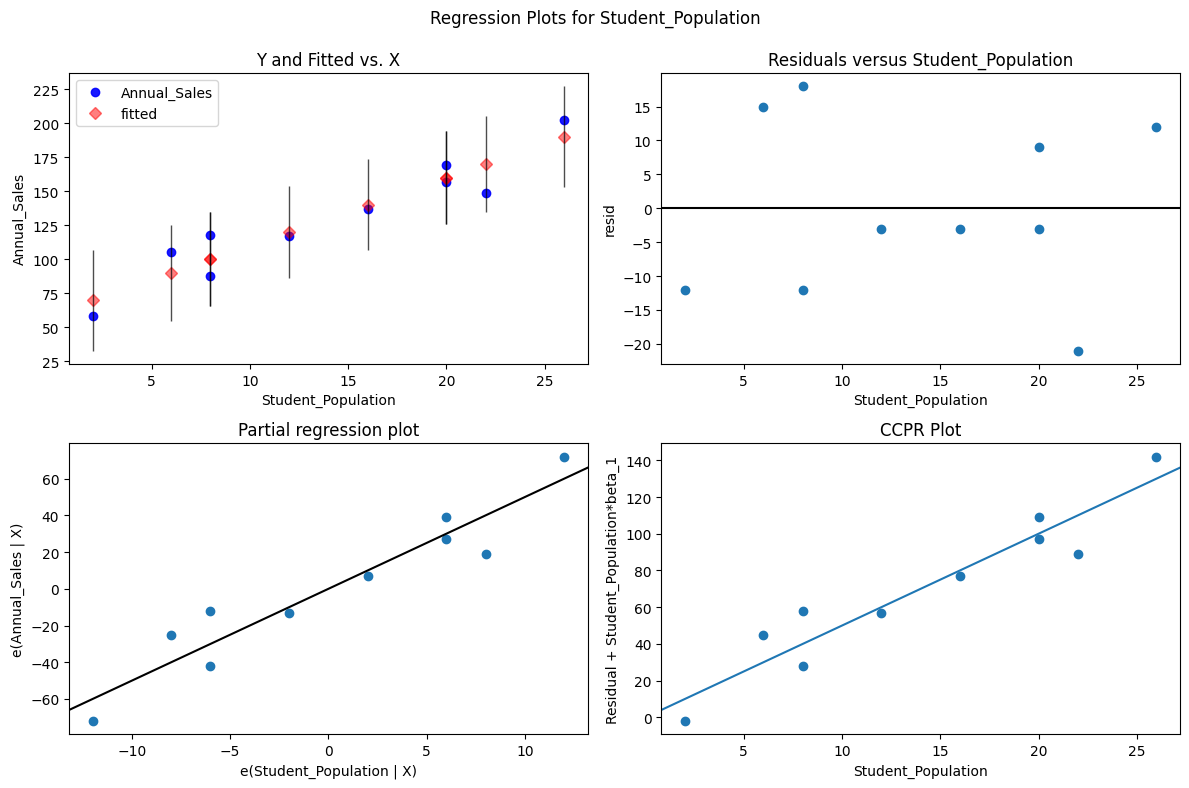

In [13]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(results, 'Student_Population', fig=fig)

In [14]:

residuals = results.resid

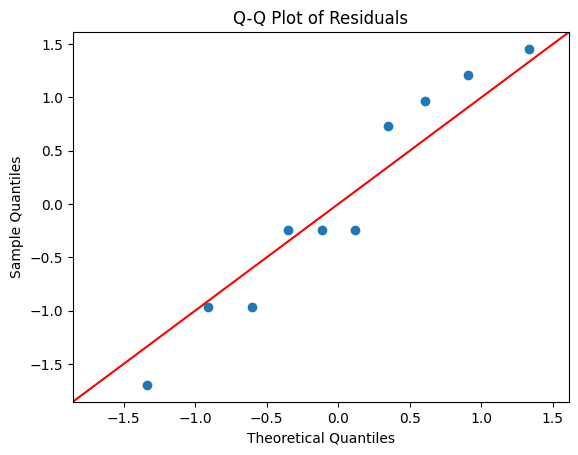

In [15]:


sm.qqplot(residuals, dist = stats.norm, fit=True,line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

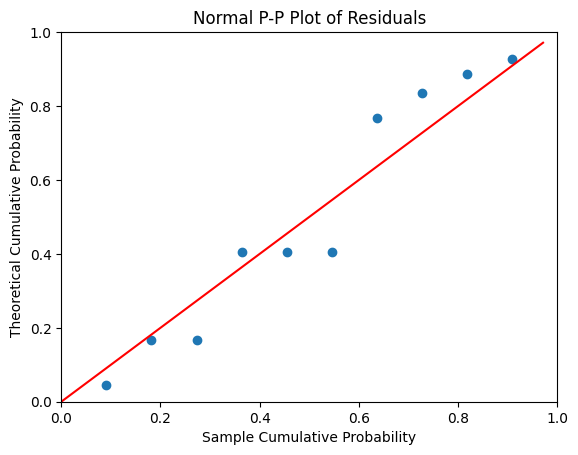

In [16]:


# Create a P-P plot
pplot = smg.ProbPlot(residuals, dist = stats.norm, fit=True)
fig = pplot.ppplot(line='45')
plt.title("Normal P-P Plot of Residuals")
plt.xlabel("Sample Cumulative Probability")
plt.ylabel("Theoretical Cumulative Probability")
plt.show()

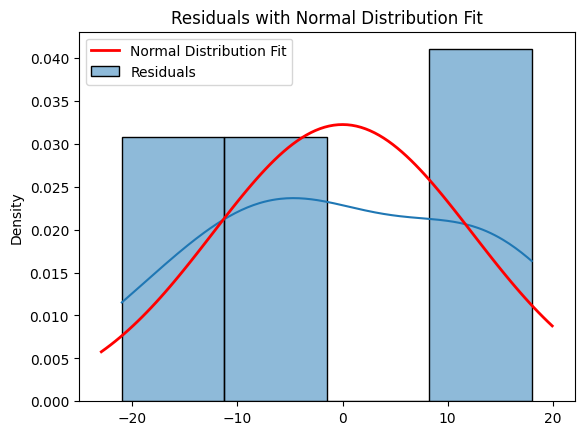

In [20]:
# Plot histogram and KDE
sns.histplot(residuals, bins=4, kde=True, label='Residuals', stat='density')

mu, std = stats.norm.fit(residuals)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, color='red', linewidth=2, label='Normal Distribution Fit')

plt.legend()
plt.title('Residuals with Normal Distribution Fit')
plt.show()